<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptive linear neuron (Adaline) - gradient descent - exmple - Ibrahim 22.08.2020

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

In [88]:
# Load IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [84]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
x = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)
print(y)
print(len(x))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
100


In [85]:
class adaline(object):
  def __init__(self, epochs=100, eta=0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels):
    x = training_inputs
    t = training_labels
    self.cost = []   # to plot cost function over epochs
    self.w = random.rand(training_inputs.ndim+1)
    for i in range(self.epochs):
      net = np.dot(x, self.w[1:])+self.w[0]
      y = net  #linear activation function
      error = (t - y)   # this is vector
      #update weights using sum of gradients
      self.w[1:] += self.eta *  (np.dot(error, x)).mean()
      self.w[0] += self.eta * error.mean()
      cost = 0.5 * (error**2).sum()
      self.cost.append(cost)
    return self
  
  def predict(self, inputs):
    net=np.dot(inputs, self.w[1:])+self.w[0]
    return(np.where(net>=0, 1, -1)) 

[1598.7581516600821, 654.9040866039497, 276.9391098993128, 125.58351016355422, 64.97327164389769, 40.70186734452839, 30.982290872726352, 27.089970494792556, 25.531165466156654, 24.906812914411514]
[ 0.13000659  0.0900967  -0.24977468]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


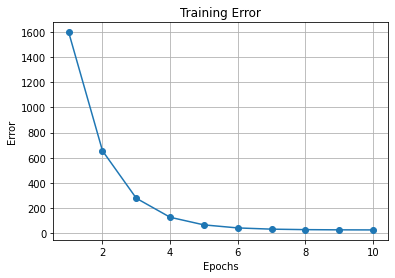

In [86]:
model=adaline(epochs=10, eta=0.0001)
model.train(x, y)
predictions = model.predict(x)

print(model.cost)
print(model.w)
print(predictions)

plt.plot(range(1,len(model.cost)+1), model.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

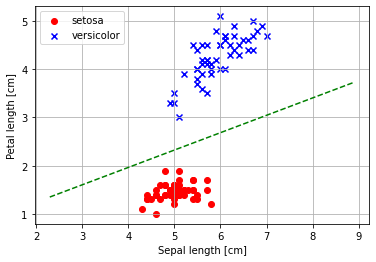

In [87]:
# scatter plot of predictions
plt.scatter(x[predictions==1,0], x[predictions==1,1], color='red', marker='o', label='setosa')
plt.scatter(x[predictions==-1,0], x[predictions==-1,1], color='blue', marker='x', label='versicolor')
# decsion line
xx1 = np.arange(x[:,0].min()-2, x[:,0].max()+2, 0.1)
xx2 = -model.w[1]/model.w[2] * xx1 - model.w[0]/model.w[2]
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()